# GROUP PROJECT: NBA Player Salary Modeling

## Introduction

Basketball statistics are statistical measures of a player's performance throughout a game. And the stats are typically collected through cameras feeding data into proprietary software in the NBA. These statistics are analyzed to help teams to identify who exceeds in specific areas and plays a part on whether the player receives incentive compensations.

Because this data contained a lot of information about NBA players, we were curious to see if certain variables enable the player to have higher salaries than others. Therefore, the question we hope to answer with our project is: "Which basketball statistics enable players to have higher salaries?" Furthermore, we want test to see if we can determine a players salary based on these statistically significant variables.

The dataset we will be using is the 2021-2022 NBA Player Stats(retrieved from kaggle.com/datasets/vivovinco/nba-player-stats), which is an aggregate of NBA player stats from the 2021-2022 regular season. We also obtained the salaries of each player from a NBA Player Salaries dataset(retrieved from https://hoopshype.com/salaries/players/l/) which we will merge with the NBA Player Stats dataset.
The collected data contains stats of all NBA players from the season where each team plays 82 games. Our variables of interest has yet to be decided but will be determine by using analysis techniques(confounding variables, correlation matrix).

Response variable: 
- Salary : How much a player makes for the year 2021-2022 in $USD

30 possible variables:
- Rk : Rank
- Player : Player's name
- Pos : Position
- Age : Player's age
- Tm : Team
- G : Games played
- GS : Games started
- MP : Minutes played per game
- FG : Field goals per game
- FGA : Field goal attempts per game
- FG% : Field goal percentage
- 3P : 3-point field goals per game
- 3PA : 3-point field goal attempts per game
- 3P% : 3-point field goal percentage
- 2P : 2-point field goals per game
- 2PA : 2-point field goal attempts per game
- 2P% : 2-point field goal percentage
-  eFG% : Effective field goal percentage
- FT : Free throws per game
- FTA : Free throw attempts per game
- FT% : Free throw percentage
- ORB : Offensive rebounds per game
- DRB : Defensive rebounds per game
- TRB : Total rebounds per game
- AST : Assists per game
- STL : Steals per game
- BLK : Blocks per game
- TOV : Turnovers per game
- PF : Personal fouls per game
- PTS : Points per game

This dataset contains a total of 812 players.

## Preliminary Results

### Loading library

In [1]:
library(cowplot)
library(digest)
library(gridExtra)
library(infer)
library(repr)
library(tidyverse)
library(broom)
library(GGally)
library(rvest)
library(googlesheets4) 
library(AER)

library(repr)
library(faraway)
library(mltools)
library(leaps)
library(glmnet)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding


Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

 

### Reading data: Player Data 
Since player data was found on Kaggle - data was downloaded and read in locally. 
This data set shows player stats for 217 NBA players in 2021-2022. This includes 30 different columns of information, not all of which will be used. 

In [2]:
data <- read.csv("data.csv",sep=";")
head(data)
tail(data)

Rk Player                   Pos Age Tm  G  GS MP   FG  FGA  ⋯ FT.   ORB DRB
1 1  Precious Achiuwa         C   22  TOR 73 28 23.6 3.6  8.3 ⋯ 0.595 2.0 4.5
2 2  Steven Adams             C   28  MEM 76 75 26.3 2.8  5.1 ⋯ 0.543 4.6 5.4
3 3  Bam Adebayo              C   24  MIA 56 56 32.6 7.3 13.0 ⋯ 0.753 2.4 7.6
4 4  Santi Aldama             PF  21  MEM 32  0 11.3 1.7  4.1 ⋯ 0.625 1.0 1.7
5 5  LaMarcus Aldridge        C   36  BRK 47 12 22.3 5.4  9.7 ⋯ 0.873 1.6 3.9
6 6  Nickeil Alexander-Walker SG  23  TOT 65 21 22.6 3.9 10.5 ⋯ 0.743 0.6 2.3
  TRB  AST STL BLK TOV PF  PTS 
1  6.5 1.1 0.5 0.6 1.2 2.1  9.1
2 10.0 3.4 0.9 0.8 1.5 2.0  6.9
3 10.1 3.4 1.4 0.8 2.6 3.1 19.1
4  2.7 0.7 0.2 0.3 0.5 1.1  4.1
5  5.5 0.9 0.3 1.0 0.9 1.7 12.9
6  2.9 2.4 0.7 0.4 1.4 1.6 10.6

Rk  Player         Pos Age Tm  G  GS MP   FG  FGA  ⋯ FT.   ORB DRB TRB AST
807 601 Thaddeus Young PF  33  SAS 26  1 14.2 2.8  4.9 ⋯ 0.455 1.5 2.0 3.6 2.3
808 601 Thaddeus Young PF  33  TOR 26  0 18.3 2.6  5.5 ⋯ 0.481 1.5 2.9 4.4 1.7
809 602 Trae Young     PG  23  ATL 76 76 34.9 9.4 20.3 ⋯ 0.904 0.7 3.1 3.7 9.7
810 603 Omer Yurtseven C   23  MIA 56 12 12.6 2.3  4.4 ⋯ 0.623 1.5 3.7 5.3 0.9
811 604 Cody Zeller    C   29  POR 27  0 13.1 1.9  3.3 ⋯ 0.776 1.9 2.8 4.6 0.8
812 605 Ivica Zubac    C   24  LAC 76 76 24.4 4.1  6.5 ⋯ 0.727 2.9 5.6 8.5 1.6
    STL BLK TOV PF  PTS 
807 0.9 0.3 1.2 1.5  6.1
808 1.2 0.4 0.8 1.7  6.3
809 0.9 0.1 4.0 1.7 28.4
810 0.3 0.4 0.7 1.5  5.3
811 0.3 0.2 0.7 2.1  5.2
812 0.5 1.0 1.5 2.7 10.3

In [3]:
id <- "1eMzdCDGCgxxDN3WMY-Jy78_NnUcMj582" #google file ID
data <- read.csv(sprintf("https://docs.google.com/uc?id=%s&export=download", id))
head(data)

Rk Player                   Pos Age Tm  G  GS MP   FG  FGA  ⋯ FT.   ORB DRB
1 1  Precious Achiuwa         C   22  TOR 73 28 23.6 3.6  8.3 ⋯ 0.595 2.0 4.5
2 2  Steven Adams             C   28  MEM 76 75 26.3 2.8  5.1 ⋯ 0.543 4.6 5.4
3 3  Bam Adebayo              C   24  MIA 56 56 32.6 7.3 13.0 ⋯ 0.753 2.4 7.6
4 4  Santi Aldama             PF  21  MEM 32  0 11.3 1.7  4.1 ⋯ 0.625 1.0 1.7
5 5  LaMarcus Aldridge        C   36  BRK 47 12 22.3 5.4  9.7 ⋯ 0.873 1.6 3.9
6 6  Nickeil Alexander-Walker SG  23  TOT 65 21 22.6 3.9 10.5 ⋯ 0.743 0.6 2.3
  TRB  AST STL BLK TOV PF  PTS 
1  6.5 1.1 0.5 0.6 1.2 2.1  9.1
2 10.0 3.4 0.9 0.8 1.5 2.0  6.9
3 10.1 3.4 1.4 0.8 2.6 3.1 19.1
4  2.7 0.7 0.2 0.3 0.5 1.1  4.1
5  5.5 0.9 0.3 1.0 0.9 1.7 12.9
6  2.9 2.4 0.7 0.4 1.4 1.6 10.6

In [4]:
str(data)

'data.frame':	812 obs. of  30 variables:
 $ Rk    : int  1 2 3 4 5 6 6 6 7 8 ...
 $ Player: chr  "Precious Achiuwa" "Steven Adams" "Bam Adebayo" "Santi Aldama" ...
 $ Pos   : chr  "C" "C" "C" "PF" ...
 $ Age   : int  22 28 24 21 36 23 23 23 26 23 ...
 $ Tm    : chr  "TOR" "MEM" "MIA" "MEM" ...
 $ G     : int  73 76 56 32 47 65 50 15 66 56 ...
 $ GS    : int  28 75 56 0 12 21 19 2 61 56 ...
 $ MP    : num  23.6 26.3 32.6 11.3 22.3 22.6 26.3 9.9 27.3 32.3 ...
 $ FG    : num  3.6 2.8 7.3 1.7 5.4 3.9 4.7 1.1 3.9 6.6 ...
 $ FGA   : num  8.3 5.1 13 4.1 9.7 10.5 12.6 3.2 8.6 9.7 ...
 $ FG.   : num  0.439 0.547 0.557 0.402 0.55 0.372 0.375 0.333 0.448 0.677 ...
 $ X3P   : num  0.8 0 0 0.2 0.3 1.6 1.9 0.7 2.4 0 ...
 $ X3PA  : num  2.1 0 0.1 1.5 1 5.2 6.1 2.2 5.9 0.2 ...
 $ X3P.  : num  0.359 0 0 0.125 0.304 0.311 0.311 0.303 0.409 0.1 ...
 $ X2P   : num  2.9 2.8 7.3 1.5 5.1 2.3 2.8 0.4 1.5 6.6 ...
 $ X2PA  : num  6.1 5 12.9 2.6 8.8 5.3 6.5 1 2.7 9.6 ...
 $ X2P.  : num  0.468 0.548 0.562 0.56 0.

### Reading Data: Salary Data - from Web
Demonstrating that a dataset can be read from web, we found the salary of the 217 NBA players from 2021-2022. This only includes two columns - X1 (Player Name) and X2 (Player Salary) 

In [5]:
salary_html <- read_html("https://hoopshype.com/salaries/players/2021-2022.html") %>%
                html_nodes("tbody .name , tbody .hh-salaries-sorted") %>%
                html_text()
salary <- str_replace_all(salary_html, "[\t\n$,]" , "")
salary_data = data.frame(matrix(salary,ncol=2,byrow=T),
                stringsAsFactors=FALSE)
head(salary_data)

X1                X2      
1 Stephen Curry     48070014
2 John Wall         47345760
3 Russell Westbrook 47063478
4 LeBron James      44474988
5 Kevin Durant      44119845
6 Bradley Beal      43279250

### Merging Datasets
In order to create the final dataset to use, we combine the two datasets to add Salary into the the player data collected from Kaggle - with the X1 column being the same as the player column in order to ensure that the salary column is associated with the right players. 

In [6]:
data_all <- merge(data, salary_data, by.x = "Player", by.y = "X1")
head(data_all)

Player        Rk  Pos Age Tm  G  GS MP   FG  FGA  ⋯ ORB DRB TRB AST STL BLK
1 Aaron Gordon  198 PF  26  DEN 75 75 31.7 5.8 11.1 ⋯ 1.7 4.2 5.9 2.5 0.6 0.6
2 Aaron Holiday 244 PG  25  WAS 41 14 16.2 2.4  5.2 ⋯ 0.2 1.4 1.6 1.9 0.6 0.2
3 Aaron Holiday 244 PG  25  PHO 22  1 16.3 2.3  5.6 ⋯ 0.7 1.8 2.5 3.4 0.8 0.0
4 Aaron Holiday 244 PG  25  TOT 63 15 16.2 2.4  5.4 ⋯ 0.4 1.6 1.9 2.4 0.7 0.1
5 Aaron Nesmith 406 SF  22  BOS 52  3 11.0 1.4  3.5 ⋯ 0.3 1.4 1.7 0.4 0.4 0.1
6 Aaron Wiggins 581 SG  23  OKC 50 35 24.2 3.1  6.7 ⋯ 1.0 2.5 3.6 1.4 0.6 0.2
  TOV PF  PTS  X2      
1 1.8 2.0 15.0 19690909
2 1.0 1.5  6.1 1968175 
3 1.3 1.5  6.8 1968175 
4 1.1 1.5  6.3 1968175 
5 0.6 1.3  3.8 3804360 
6 1.1 1.9  8.3 1563518

### Wrangling data
We remove any duplicate or useless columns, change column name and type for simplicity, and remove rows having NULL. 

In [7]:
colnames(data_all)[which(names(data_all) == "X2")] <- "SALARY"
head(data_all)

Player        Rk  Pos Age Tm  G  GS MP   FG  FGA  ⋯ ORB DRB TRB AST STL BLK
1 Aaron Gordon  198 PF  26  DEN 75 75 31.7 5.8 11.1 ⋯ 1.7 4.2 5.9 2.5 0.6 0.6
2 Aaron Holiday 244 PG  25  WAS 41 14 16.2 2.4  5.2 ⋯ 0.2 1.4 1.6 1.9 0.6 0.2
3 Aaron Holiday 244 PG  25  PHO 22  1 16.3 2.3  5.6 ⋯ 0.7 1.8 2.5 3.4 0.8 0.0
4 Aaron Holiday 244 PG  25  TOT 63 15 16.2 2.4  5.4 ⋯ 0.4 1.6 1.9 2.4 0.7 0.1
5 Aaron Nesmith 406 SF  22  BOS 52  3 11.0 1.4  3.5 ⋯ 0.3 1.4 1.7 0.4 0.4 0.1
6 Aaron Wiggins 581 SG  23  OKC 50 35 24.2 3.1  6.7 ⋯ 1.0 2.5 3.6 1.4 0.6 0.2
  TOV PF  PTS  SALARY  
1 1.8 2.0 15.0 19690909
2 1.0 1.5  6.1 1968175 
3 1.3 1.5  6.8 1968175 
4 1.1 1.5  6.3 1968175 
5 0.6 1.3  3.8 3804360 
6 1.1 1.9  8.3 1563518

In [8]:
clean_data <- data_all %>%
    select(-Rk, -GS) %>%
    transform(SALARY = as.numeric(SALARY)) %>%
    filter_all(any_vars(! is.na(.)))
head(clean_data)

Player        Pos Age Tm  G  MP   FG  FGA  FG.   X3P ⋯ ORB DRB TRB AST STL
1 Aaron Gordon  PF  26  DEN 75 31.7 5.8 11.1 0.520 1.2 ⋯ 1.7 4.2 5.9 2.5 0.6
2 Aaron Holiday PG  25  WAS 41 16.2 2.4  5.2 0.467 0.6 ⋯ 0.2 1.4 1.6 1.9 0.6
3 Aaron Holiday PG  25  PHO 22 16.3 2.3  5.6 0.411 0.7 ⋯ 0.7 1.8 2.5 3.4 0.8
4 Aaron Holiday PG  25  TOT 63 16.2 2.4  5.4 0.447 0.6 ⋯ 0.4 1.6 1.9 2.4 0.7
5 Aaron Nesmith SF  22  BOS 52 11.0 1.4  3.5 0.396 0.6 ⋯ 0.3 1.4 1.7 0.4 0.4
6 Aaron Wiggins SG  23  OKC 50 24.2 3.1  6.7 0.463 0.8 ⋯ 1.0 2.5 3.6 1.4 0.6
  BLK TOV PF  PTS  SALARY  
1 0.6 1.8 2.0 15.0 19690909
2 0.2 1.0 1.5  6.1  1968175
3 0.0 1.3 1.5  6.8  1968175
4 0.1 1.1 1.5  6.3  1968175
5 0.1 0.6 1.3  3.8  3804360
6 0.2 1.1 1.9  8.3  1563518

In [9]:
sapply(clean_data, function(x) sum(is.na(x))) #confirming there are no nulls

Player    Pos    Age     Tm      G     MP     FG    FGA    FG.    X3P   X3PA 
     0      0      0      0      0      0      0      0      0      0      0 
  X3P.    X2P   X2PA   X2P.   eFG.     FT    FTA    FT.    ORB    DRB    TRB 
     0      0      0      0      0      0      0      0      0      0      0 
   AST    STL    BLK    TOV     PF    PTS SALARY 
     0      0      0      0      0      0      0

No nulls in any column.

## Plotting Data
Visually explore the association between variables in the dataset using pair plots

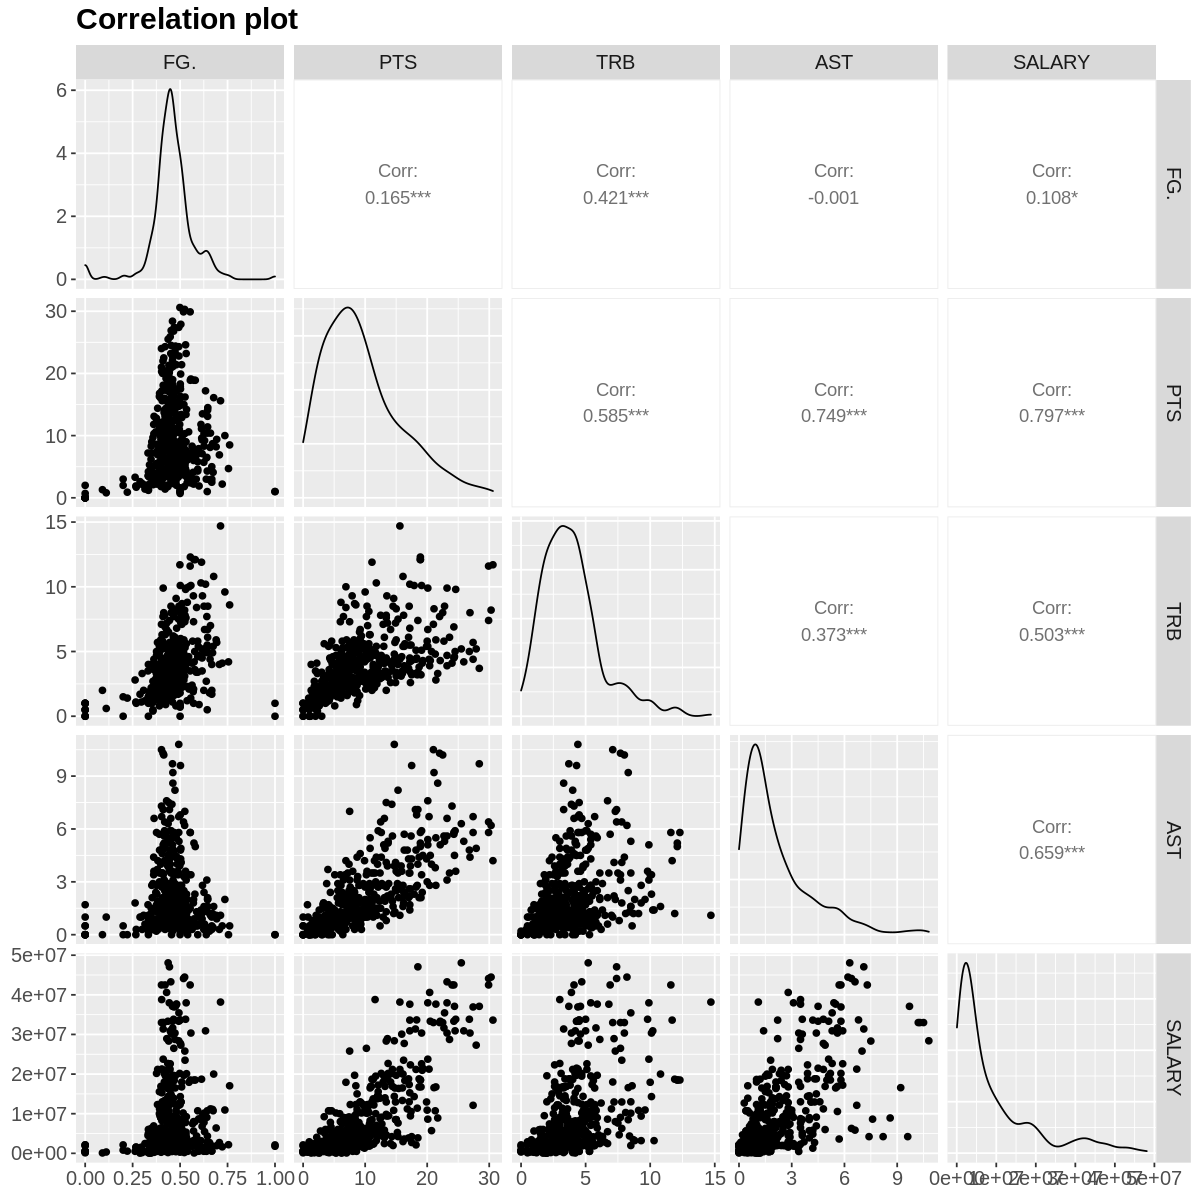

In [10]:
data_pair_plots <- 
  clean_data %>% 
  select(FG., PTS, TRB, AST, SALARY) %>%
  ggpairs() +
    theme(
    text = element_text(size = 15),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) +
  ggtitle("Correlation plot")
options(repr.plot.width = 10, repr.plot.height = 10)
data_pair_plots

In [11]:
corr_matrix <- clean_data %>% 
  select(FG., PTS, TRB, AST) %>% #salary not included as it is our response variable
  cor() %>%
  as.data.frame() %>%
  rownames_to_column("var1") %>%
  pivot_longer(-var1, names_to = "var2", values_to = "corr") %>%
  filter(corr != 1) %>%
  arrange(desc(corr))
head(corr_matrix)

var1 var2 corr     
1 PTS  AST  0.7490342
2 AST  PTS  0.7490342
3 PTS  TRB  0.5849237
4 TRB  PTS  0.5849237
5 FG.  TRB  0.4210853
6 TRB  FG.  0.4210853

From this we can see that Points per Game and Assists can be considered highly correlated - introducing a 
multicollinearity problem, we will attempt to resolve this further in our analysis

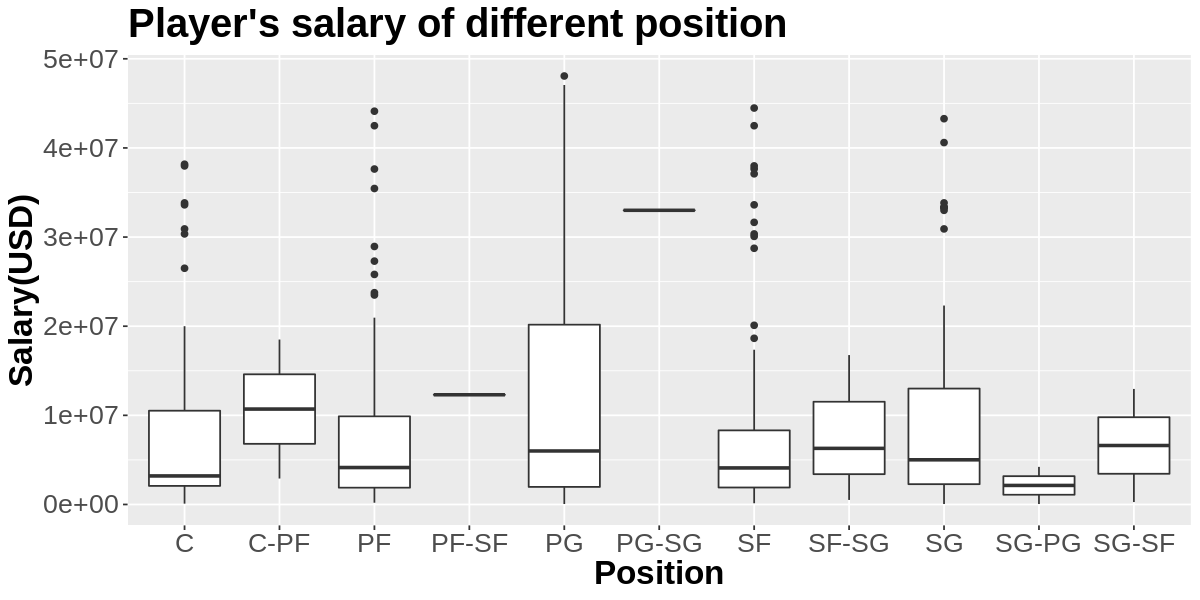

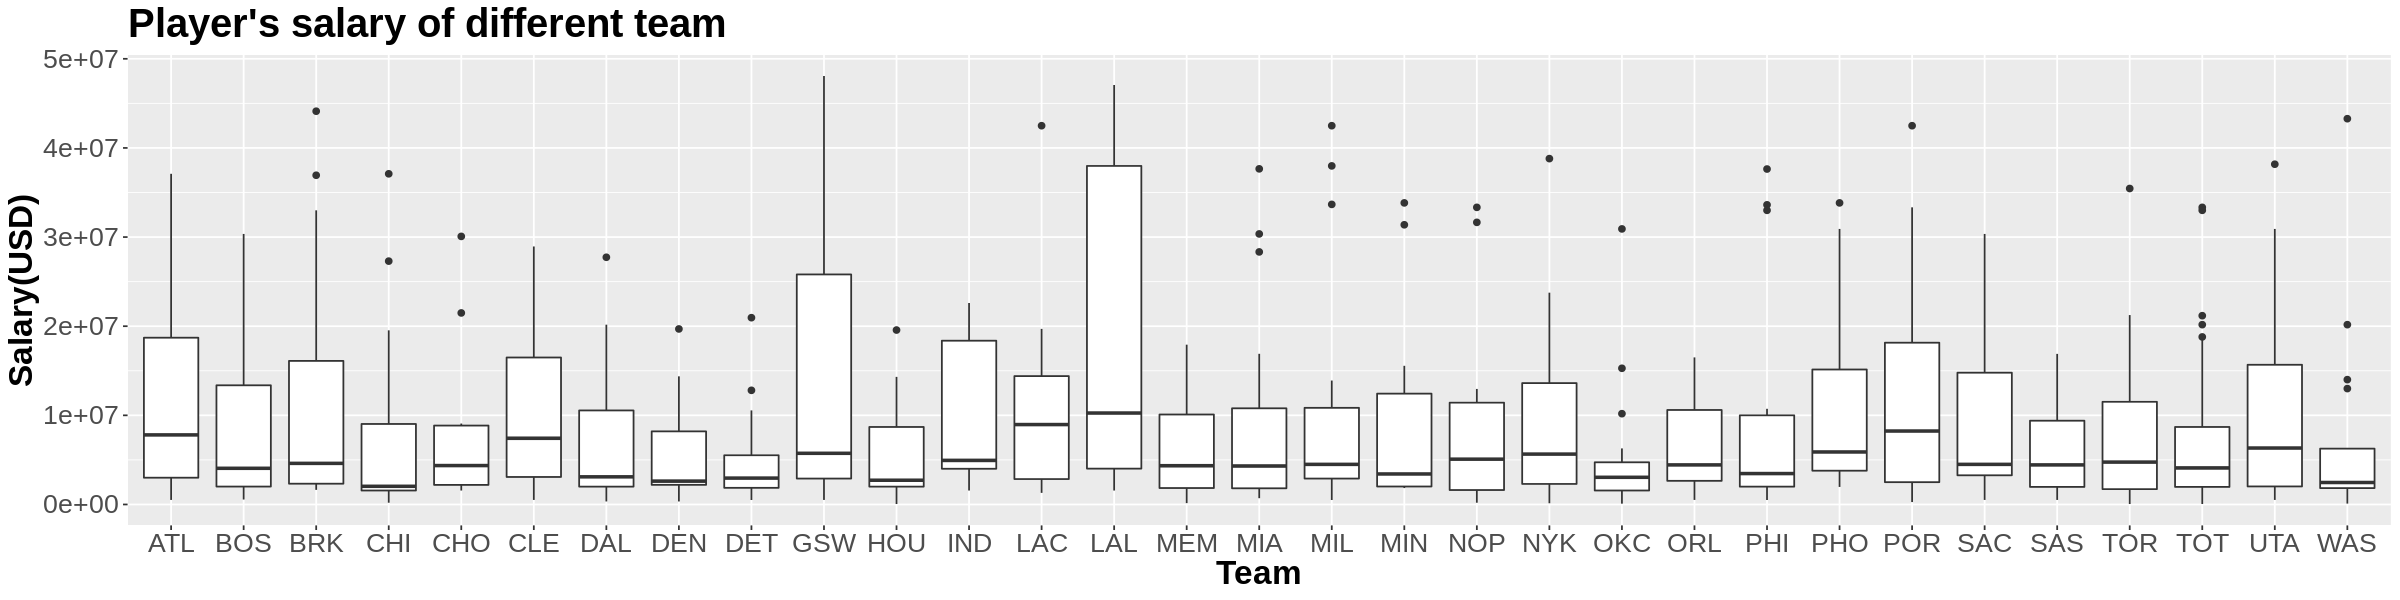

In [12]:
options(repr.plot.width = 10, repr.plot.height = 5)
pos_boxplot <- clean_data %>%
  ggplot(aes(x = Pos, y = SALARY)) +
  geom_boxplot() +
    ggtitle("Player's salary of different position")+
  labs(x = "Position") +
  labs(y = "Salary(USD)")+
    theme(text = element_text(size = 20),
          plot.title = element_text(face = "bold"),
          axis.title = element_text(face = "bold"))
pos_boxplot
options(repr.plot.width = 20, repr.plot.height = 5)
team_boxplot <- clean_data %>%
  ggplot(aes(x = Tm, y = SALARY)) +
  geom_boxplot() +
    ggtitle("Player's salary of different team")+
  labs(x = "Team") +
  labs(y = "Salary(USD)")+
    theme(text = element_text(size = 20),
          plot.title = element_text(face = "bold"),
          axis.title = element_text(face = "bold"))
team_boxplot

The two boxplots roughly show the difference in players' salaries between two discrete columns. We can see the salary varies between different positions and teams.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



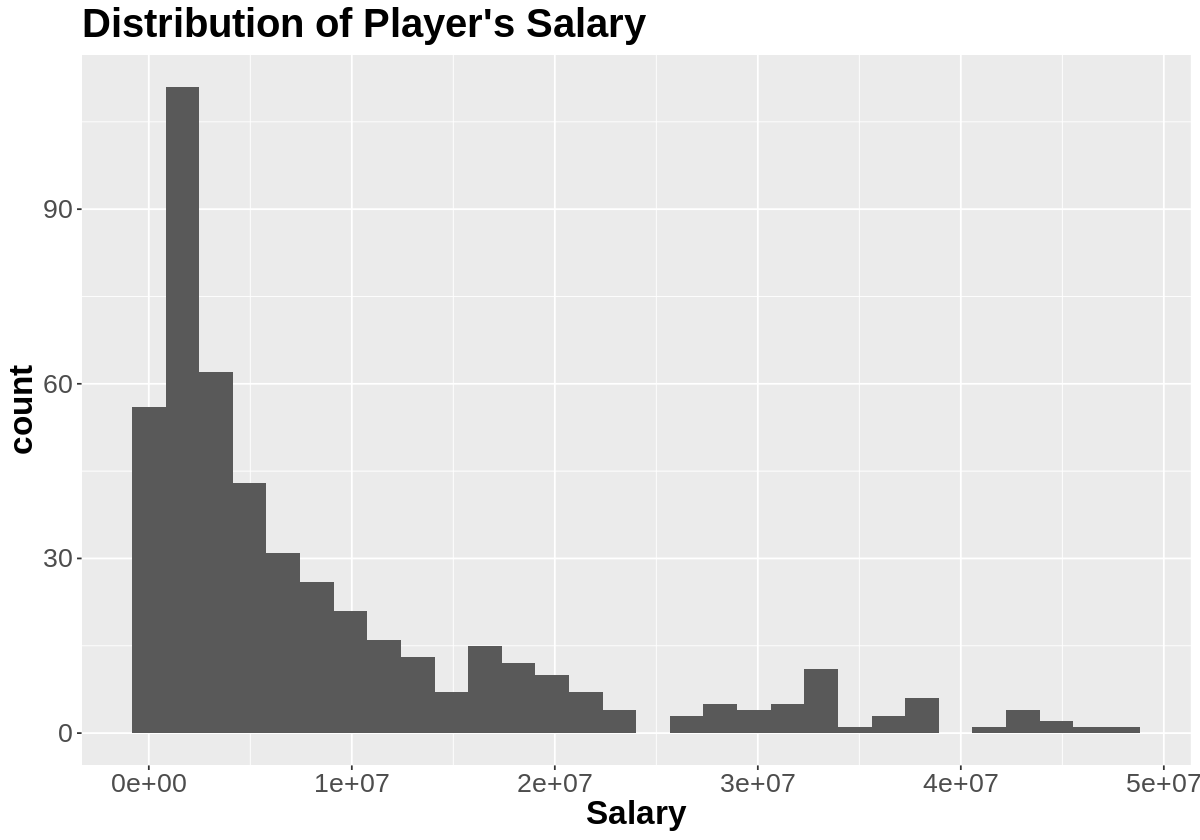

In [13]:
options(repr.plot.width = 10, repr.plot.height = 7)
salary_distribution <- clean_data %>%
    ggplot(aes(x = SALARY)) +
    geom_histogram() +
    ggtitle("Distribution of Player's Salary")+
    labs(x = "Salary") +
    theme(
        text = element_text(size = 20),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold"))
salary_distribution

The distrubution of salary is extremely right-skewed, so we cannot assume that the distribution of our target is normal distribution.

## Predictive Modeling using Linear Regression

In [14]:
clean_data <- data_all %>%
    select(-Player) %>%
    transform(SALARY = as.numeric(SALARY)) %>%
    filter_all(any_vars(! is.na(.)))
head(clean_data)

Rk  Pos Age Tm  G  GS MP   FG  FGA  FG.   ⋯ ORB DRB TRB AST STL BLK TOV PF 
1 198 PF  26  DEN 75 75 31.7 5.8 11.1 0.520 ⋯ 1.7 4.2 5.9 2.5 0.6 0.6 1.8 2.0
2 244 PG  25  WAS 41 14 16.2 2.4  5.2 0.467 ⋯ 0.2 1.4 1.6 1.9 0.6 0.2 1.0 1.5
3 244 PG  25  PHO 22  1 16.3 2.3  5.6 0.411 ⋯ 0.7 1.8 2.5 3.4 0.8 0.0 1.3 1.5
4 244 PG  25  TOT 63 15 16.2 2.4  5.4 0.447 ⋯ 0.4 1.6 1.9 2.4 0.7 0.1 1.1 1.5
5 406 SF  22  BOS 52  3 11.0 1.4  3.5 0.396 ⋯ 0.3 1.4 1.7 0.4 0.4 0.1 0.6 1.3
6 581 SG  23  OKC 50 35 24.2 3.1  6.7 0.463 ⋯ 1.0 2.5 3.6 1.4 0.6 0.2 1.1 1.9
  PTS  SALARY  
1 15.0 19690909
2  6.1  1968175
3  6.8  1968175
4  6.3  1968175
5  3.8  3804360
6  8.3  1563518

In [15]:
# splitting of data set into training and testing data on a 70-30 split 
set.seed(12345)


clean_data$ID<- rownames(clean_data)

training_salary <- sample_n(clean_data, size = nrow(clean_data)*0.7, replcae = FALSE)

testing_salary <- anti_join(clean_data, training_salary, by='ID')




training_salary$ID <- NULL
testing_salary$ID  <-  NULL
clean_data$ID<- NULL


## Forward Selection

In [16]:
#forward selection
#removed Position and Tm as it doesn't make sense to our regression model
salary_forward_sel <- regsubsets(
  x= SALARY ~.-Pos-Tm, 
  nvmax= 27,
  data= testing_salary,
  method="forward",
)

salary_forward_summary <- summary(salary_forward_sel)


salary_forward_summary_df <- tibble(
   n_input_variables = 1:27,
   RSQ = salary_forward_summary$rsq,
   RSS = salary_forward_summary$rss,
   ADJ.R2 = salary_forward_summary$adjr2,
   Cp = salary_forward_summary$cp,
  BIC = salary_forward_summary$bic,
)
salary_forward_summary_df  #10 input variables

n_input_variables RSQ       RSS          ADJ.R2    Cp        BIC       
1   1                0.5484888 7.092378e+15 0.5453313 65.702707 -105.34401
2   2                0.6428064 5.610828e+15 0.6377755 24.523900 -134.34402
3   3                0.6555711 5.410319e+15 0.6482428 20.680204 -134.64387
4   4                0.6640037 5.277860e+15 0.6544038 18.819747 -133.26132
5   5                0.6717527 5.156138e+15 0.6599452 17.272256 -131.66784
6   6                0.6837861 4.967115e+15 0.6700377 13.763304 -132.10666
7   7                0.6908641 4.855933e+15 0.6750689 12.522983 -130.41242
8   8                0.7042286 4.646003e+15 0.6868303  8.404712 -131.84381
9   9                0.7144521 4.485412e+15 0.6954155  5.724382 -131.96775
10 10                0.7173709 4.439562e+15 0.6962792  6.388122 -128.48082
11 11                0.7203755 4.392366e+15 0.6972487  7.012625 -125.05381
12 12                0.7240016 4.335408e+15 0.6989108  7.352611 -121.96967
13 13                0.7256000 4.310300e+15 0.6983694  8.620858 -117.83512
14 14                0.7264537 4.296889e+15 0.6969949 10.230012 -113.31023
15 15                0.7276348 4.278337e+15 0.6959644 11.689320 -108.96091
16 16                0.7285071 4.264634e+15 0.6945705 13.289966 -104.44932
17 17                0.7309093 4.226901e+15 0.6948892 14.190256 -100.76125
18 18                0.7314200 4.218879e+15 0.6930514 15.956452  -96.05997
19 19                0.7359303 4.148030e+15 0.6957917 15.891604  -93.53895
20 20                0.7394528 4.092698e+15 0.6974291 16.278994  -90.50943
21 21                0.7411734 4.065671e+15 0.6969835 17.491301  -86.49342
22 22                0.7425460 4.044111e+15 0.6961198 18.862951  -82.28766
23 23                0.7435445 4.028426e+15 0.6947967 20.405831  -77.87439
24 24                0.7442897 4.016721e+15 0.6931476 22.064679  -73.31960
25 25                0.7444096 4.014836e+15 0.6907142 24.009755  -68.41091
26 26                0.7444276 4.014554e+15 0.6881150 26.001530  -63.44437
27 27                0.7444309 4.014501e+15 0.6854535 28.000000  -58.46954

In [17]:
max <-  salary_forward_summary_df%>% 
    filter(salary_forward_summary_df['Cp'] == min(salary_forward_summary_df['Cp']))

max

n_input_variables RSQ       RSS          ADJ.R2    Cp       BIC      
1 9                 0.7144521 4.485412e+15 0.6954155 5.724382 -131.9677

- We select the model with 10 input variables with a good adjusted R2. The Cp statistic is also low.

In [18]:
# to see which row model 10 corresponds to
model_10 <-  data.frame(salary_forward_summary$which[max$n_input_variables,])

names(model_10)[names(model_10) == colnames(model_10)] <- 'statistic'

new_model_10<- data.frame(model_10, rownames(model_10))


# selects rows that are TRUE for statistic column
true_model <-  new_model_10[rowSums(model_10, na.rm=TRUE) > 0,]

names(true_model)[names(true_model) == 'rownames.model_10.'] <- 'variable'

In [19]:
true_model

statistic variable   
(Intercept) TRUE      (Intercept)
Rk          TRUE      Rk         
Age         TRUE      Age        
GS          TRUE      GS         
FTA         TRUE      FTA        
FT.         TRUE      FT.        
DRB         TRUE      DRB        
TRB         TRUE      TRB        
PF          TRUE      PF         
PTS         TRUE      PTS

Subset of variables from generative model : **Rk, Age,G,GS,FG,DRB,TRB,STL,PF,PTS**

In [20]:
salary_fwd_generative<- lm(SALARY ~ Rk+Age+G+GS+FG+DRB+TRB+STL+PF+PTS,  training_salary)

# predictive additive LR with all inputs

#made new data frame without the 2 categorical variables
train <- training_salary[, -c(2,4)]
test <- testing_salary[, -c(2,4)]
#salary_full_OLS_add <- lm(SALARY~.-Pos-Tm, training_salary) didn't work because of categorical variables
salary_full_OLS_add <- lm(SALARY~., train)

salary_test_pred_red_OLS_add<- predict(salary_fwd_generative, test)
salary_test_pred_full_OLS_add <- predict(salary_full_OLS_add, test)

In [21]:
salary_R_MSE_models <- tibble(
  Model = "OLS Full Regression",
  R_MSE = rmse(
    preds= salary_test_pred_full_OLS_add,
    actuals = testing_salary$SALARY
  )
)

salary_R_MSE_models <- rbind(salary_R_MSE_models,
  tibble(
    Model = "Forward OLS Reduced Regression",
    R_MSE = rmse(
        preds = salary_test_pred_red_OLS_add,
        actuals = testing_salary$SALARY
    )
  )
                            )

salary_R_MSE_models

Model                          R_MSE  
1 OLS Full Regression            6301431
2 Forward OLS Reduced Regression 6105225

## Backward Selection

In [22]:
#backward
# splitting of data set into training and testing data on a 70-30 split 
set.seed(12345)

clean_data$ID<- rownames(clean_data)
training_salary <- sample_n(clean_data, size = nrow(clean_data)*0.7, replcae = FALSE)
testing_salary <- anti_join(clean_data, training_salary, by='ID')

training_salary$ID <- NULL
testing_salary$ID  <-  NULL
clean_data$ID<- NULL


#removed Position and Tm as it doesn't make sense to our regression model
salary_backward_sel <- regsubsets(
  x= SALARY ~.-Pos-Tm,  
  nvmax= 27,
  data= testing_salary,
  method="backward",
)

salary_backward_summary <- summary(salary_backward_sel)


salary_backward_summary_df <- tibble(
   n_input_variables = 1:27,
   RSQ = salary_backward_summary$rsq,
   RSS = salary_backward_summary$rss,
   ADJ.R2 = salary_backward_summary$adjr2,
   Cp = salary_forward_summary$cp,
  BIC = salary_forward_summary$bic,
)

salary_backward_summary_df  #10 input variables

n_input_variables RSQ       RSS          ADJ.R2    Cp        BIC       
1   1                0.4935085 7.956013e+15 0.4899666 65.702707 -105.34401
2   2                0.5923452 6.403477e+15 0.5866036 24.523900 -134.34402
3   3                0.6012436 6.263700e+15 0.5927595 20.680204 -134.64387
4   4                0.6510639 5.481119e+15 0.6410943 18.819747 -133.26132
5   5                0.6721967 5.149163e+15 0.6604052 17.272256 -131.66784
6   6                0.6834369 4.972602e+15 0.6696732 13.763304 -132.10666
7   7                0.6896669 4.874740e+15 0.6738104 12.522983 -130.41242
8   8                0.6994911 4.720420e+15 0.6818142  8.404712 -131.84381
9   9                0.7081930 4.583730e+15 0.6887392  5.724382 -131.96775
10 10                0.7138927 4.494198e+15 0.6925414  6.388122 -128.48082
11 11                0.7173923 4.439226e+15 0.6940187  7.012625 -125.05381
12 12                0.7234425 4.344189e+15 0.6983009  7.352611 -121.96967
13 13                0.7279814 4.272892e+15 0.7009872  8.620858 -117.83512
14 14                0.7310533 4.224639e+15 0.7020898 10.230012 -113.31023
15 15                0.7344537 4.171225e+15 0.7035762 11.689320 -108.96091
16 16                0.7371291 4.129199e+15 0.7042702 13.289966 -104.44932
17 17                0.7389707 4.100272e+15 0.7040297 14.190256 -100.76125
18 18                0.7403554 4.078520e+15 0.7032633 15.956452  -96.05997
19 19                0.7417179 4.057119e+15 0.7024590 15.891604  -93.53895
20 20                0.7430081 4.036852e+15 0.7015578 16.278994  -90.50943
21 21                0.7437012 4.025964e+15 0.6999429 17.491301  -86.49342
22 22                0.7440355 4.020713e+15 0.6978780 18.862951  -82.28766
23 23                0.7442312 4.017639e+15 0.6956140 20.405831  -77.87439
24 24                0.7443686 4.015481e+15 0.6932423 22.064679  -73.31960
25 25                0.7444096 4.014836e+15 0.6907142 24.009755  -68.41091
26 26                0.7444276 4.014554e+15 0.6881150 26.001530  -63.44437
27 27                0.7444309 4.014501e+15 0.6854535 28.000000  -58.46954

In [23]:
max2 <-  salary_backward_summary_df%>%
    filter(salary_backward_summary_df['Cp'] == min(salary_backward_summary_df['Cp']))

max2

n_input_variables RSQ      RSS         ADJ.R2    Cp       BIC      
1 9                 0.708193 4.58373e+15 0.6887392 5.724382 -131.9677

In [24]:
# model 10 has lowest Cp
model_10 <-  data.frame(salary_backward_summary$which[max2$n_input_variables,])


names(model_10)[names(model_10) == colnames(model_10)] <- 'statistic'
new_model_10<- data.frame(model_10, rownames(model_10))

# selects rows that are TRUE for statistic column
true_model <-  new_model_10[rowSums(model_10, na.rm=TRUE) > 0,]

names(true_model)[names(true_model) == 'rownames.model_10.'] <- 'variable'

true_model$variable

[1] "(Intercept)" "Rk"          "Age"         "GS"          "X3P"        
 [6] "X2P"         "FTA"         "ORB"         "TRB"         "PF"

In [25]:
true_model$variable

[1] "(Intercept)" "Rk"          "Age"         "GS"          "X3P"        
 [6] "X2P"         "FTA"         "ORB"         "TRB"         "PF"

In [26]:
salary_bwd_generative<- lm(SALARY ~ Rk+Age+GS+X3P+X2P+FTA+ORB+TRB+PF,  training_salary)
salary_bwd_generative
salary_test_pred_red_OLS_add<- predict(salary_bwd_generative, testing_salary[, -c(2,4)])


salary_R_MSE_models <- rbind(salary_R_MSE_models,
  tibble(
    Model = "Backward OLS Reduced Regression",
    R_MSE = rmse(
        preds = salary_test_pred_red_OLS_add,
        actuals = testing_salary$SALARY
    )
  )
                            )

salary_R_MSE_models


Call:
lm(formula = SALARY ~ Rk + Age + GS + X3P + X2P + FTA + ORB + 
    TRB + PF, data = training_salary)

Coefficients:
(Intercept)           Rk          Age           GS          X3P          X2P  
 -1.594e+07    2.904e+02    5.951e+05    4.675e+04    3.066e+06    2.286e+06  
        FTA          ORB          TRB           PF  
  1.549e+06   -1.606e+05    1.700e+05   -2.344e+06  


Model                           R_MSE  
1 OLS Full Regression             6301431
2 Forward OLS Reduced Regression  6105225
3 Backward OLS Reduced Regression 6011511

## LASSO

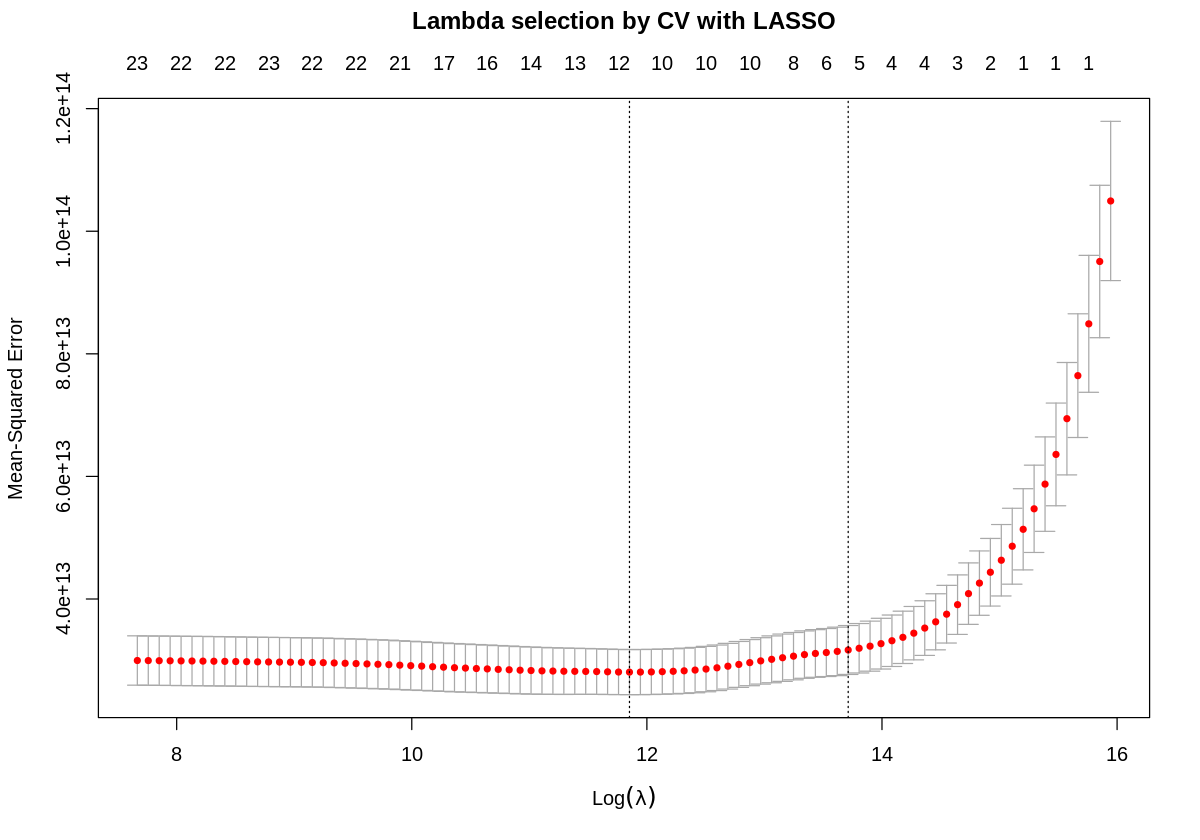

In [27]:
X_train <- training_salary %>% select(-"Pos", -"Tm", -"SALARY")  %>% as.matrix()
Y_train <- training_salary %>% select("SALARY")  %>% as.matrix()


X_test <- testing_salary %>% select(-"Pos", -"Tm", -"SALARY")  %>% as.matrix()
Y_test <- testing_salary %>% select("SALARY")  %>% as.matrix()

# Fit a CV of LASSO Poisson Regression and find optimal lambda
cv_lasso <- cv.glmnet(
  x = X_train, y = Y_train,
  nfolds = 10,
  alpha = 1,
  type.measure = "mse"
)

plot(cv_lasso, main = "Lambda selection by CV with LASSO\n\n")

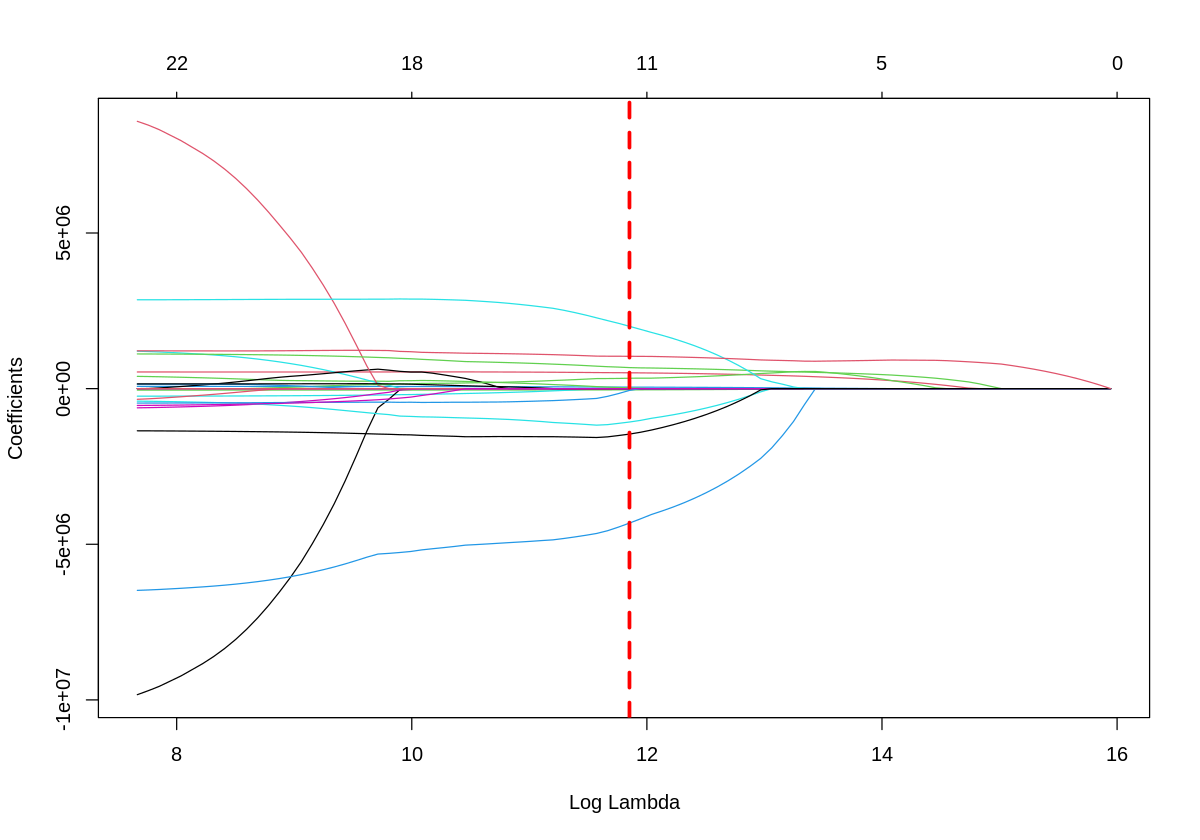

In [28]:
lambda_min_MSE_LASSO <- round(cv_lasso$lambda.min, 4)
plot(cv_lasso$glmnet.fit, "lambda")
abline(v = log(lambda_min_MSE_LASSO), col = "red", lwd = 3, lty = 2)

Here is the visualization of the estimated regression coefficients over the 𝜆 -grid.

In [29]:
# Fit the glmnet with optimal lambda
LASSO_min <- glmnet(
  x = X_train, y = Y_train,
  alpha = 1,
  type.measure = "mse",
  lambda = lambda_min_MSE_LASSO
)
LASSO_min$beta

27 x 1 sparse Matrix of class "dgCMatrix"
              s0
Rk          .   
Age    509083.39
G      -38866.05
GS      48550.71
MP          .   
FG          .   
FGA         .   
FG.         .   
X3P         .   
X3PA    25380.55
X3P. -4319789.83
X2P         .   
X2PA        .   
X2P.        .   
eFG.        .   
FT     334851.56
FTA         .   
FT.  -1073119.56
ORB         .   
DRB         .   
TRB         .   
AST    676736.11
STL    -61243.11
BLK   2003701.98
TOV         .   
PF   -1460119.86
PTS   1038025.14

In [30]:
test_pred_LASSO_min <- predict(LASSO_min,
  newx = X_test)
salary_R_MSE_models <- rbind(salary_R_MSE_models,
  tibble(
    Model = "LASSO Regression with minimum MSE",
    R_MSE = rmse(
      preds = test_pred_LASSO_min,
      actuals = Y_test
    )
  )
)

salary_R_MSE_models

Model                             R_MSE  
1 OLS Full Regression               6301431
2 Forward OLS Reduced Regression    6105225
3 Backward OLS Reduced Regression   6011511
4 LASSO Regression with minimum MSE 6138524

- Based on our results above, the **Backward OLS reduced regression model** has the best out-of-sample prediction performance. Therefore we will proceed to see how well the model fits our data.

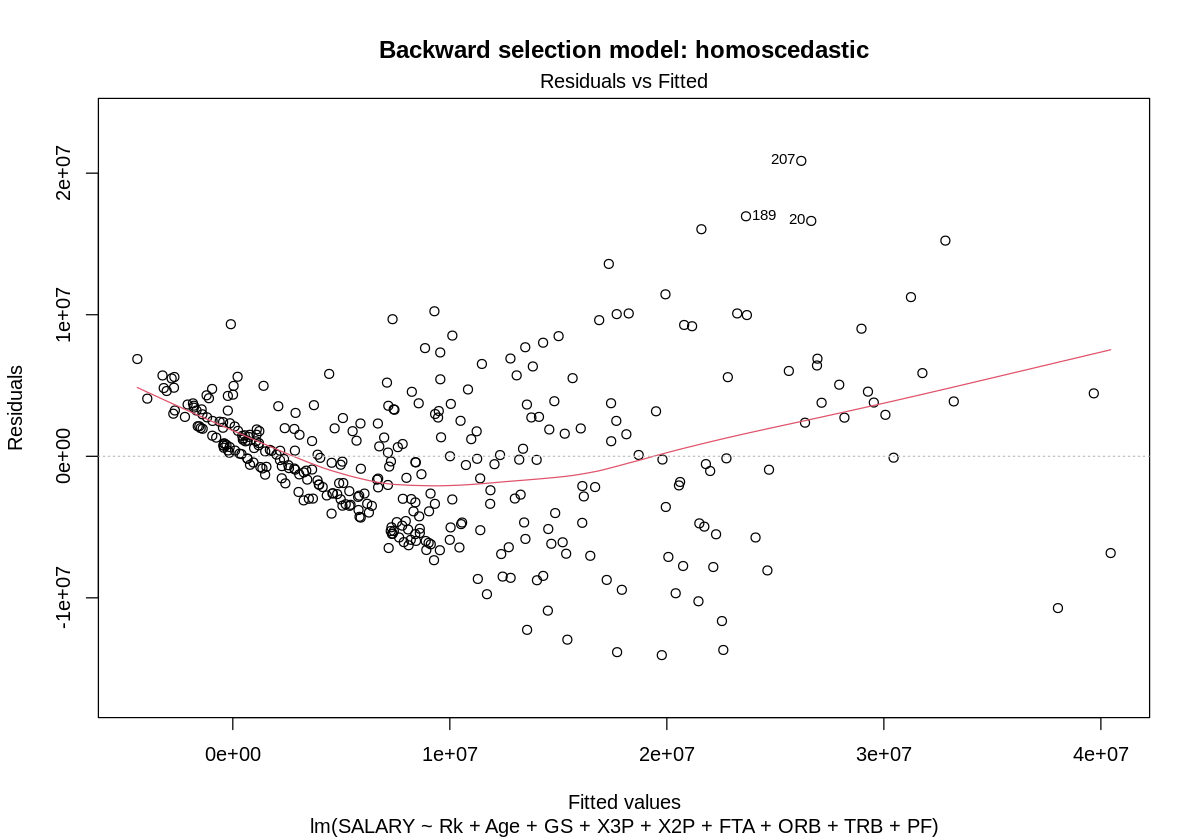

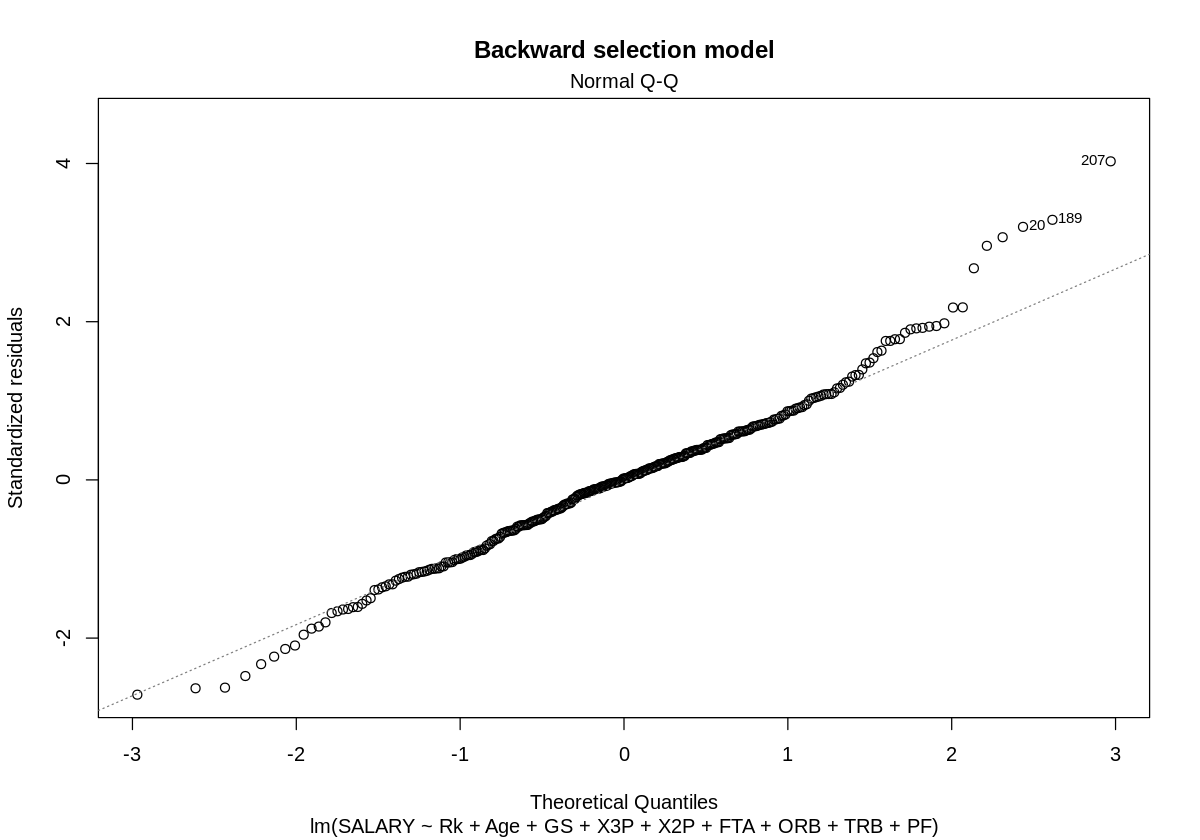

In [41]:
#check heteroscedasticity
plot(salary_bwd_generative, 1, main = "Backward selection model: homoscedastic")
plot(salary_bwd_generative, 2, main = "Backward selection model")

Seen from the plots:

(1) cloud of points in the residuals vs. fitted plot shows a clear funnel shape, indicating a non-constant variance

(2) most of the points in the  𝑄 - 𝑄  plot lie on a dotted line with degree less than 45°(about 30°),  suggesting that the errors are not normally distributed.

In [42]:
#check multicollinearity
vif(salary_bwd_generative)

Rk      Age       GS      X3P      X2P      FTA      ORB      TRB 
1.015555 1.091177 2.299294 2.178994 4.500692 3.367864 4.839797 6.430243 
      PF 
2.325769

- According to VIF function we see that there is supposedly multicollinearity in the model that we have chosen. The variables **DRB and TRB, FG and PTS** variables have high VIF. **DRB(Defensive Rebounds)** and **TRB(Total Rebounds per game)** seemingly to be correlated. So we remove DRB. We get the following model: 

In [44]:
#new model with no multicollinearity
lm_no_multicollinearity <- lm(SALARY ~ Rk+Age+GS+X3P+X2P+FTA+TRB+PF,  training_salary)
summary(lm_no_multicollinearity)
vif(lm_no_multicollinearity)


Call:
lm(formula = SALARY ~ Rk + Age + GS + X3P + X2P + FTA + TRB + 
    PF, data = training_salary)

Residuals:
      Min        1Q    Median        3Q       Max 
-14007754  -3376378     22977   2985921  20937582 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.597e+07  2.001e+06  -7.984 2.43e-14 ***
Rk           2.681e+02  1.742e+03   0.154   0.8778    
Age          5.959e+05  7.373e+04   8.082 1.25e-14 ***
GS           4.690e+04  1.734e+04   2.704   0.0072 ** 
X3P          3.111e+06  3.939e+05   7.896 4.39e-14 ***
X2P          2.282e+06  3.317e+05   6.880 3.05e-11 ***
FTA          1.563e+06  3.000e+05   5.211 3.34e-07 ***
TRB          1.252e+05  2.191e+05   0.572   0.5680    
PF          -2.360e+06  5.744e+05  -4.109 5.03e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5308000 on 327 degrees of freedom
Multiple R-squared:  0.7392,	Adjusted R-squared:  0.7329 
F-statistic: 115.9 on 8 and 327 DF

Rk      Age       GS      X3P      X2P      FTA      TRB       PF 
1.010708 1.087513 2.293929 1.583168 4.481501 3.160854 2.894837 2.273778

### How good does this new model with no multicollinearity fit the data compared to the forward reduced model we had chosen? Does it fit the data better?

In [45]:
mod1<-anova(lm_no_multicollinearity,salary_fwd_generative)
mod2<-anova(lm_no_multicollinearity,salary_bwd_generative)
mod3<-anova(lm_no_multicollinearity,salary_full_OLS_add)
mod1$`Pr(>F)`
mod2$`Pr(>F)`
mod3$`Pr(>F)`

[1]          NA 0.001059961

[1]        NA 0.8536518

[1]           NA 0.0003008946

- From the results above, at 5% significance level, removing multicollinearity doesn't fit the data better than the backward reduced model's fit because the pvalue is greater than the significance level. Thus, we can use the backward reduced model for regression.

In [46]:
anova(salary_bwd_generative,salary_full_OLS_add)

Res.Df RSS          Df Sum of Sq   F        Pr(>F)      
1 326    9.213111e+15 NA          NA       NA           NA
2 308    7.928942e+15 18 1.28417e+15 2.771311 0.0001839803

- It can be seen that at 5% significance level, the borward reduced model fits the data better than the full OLS additive model.

In [47]:
red_results <- tidy(salary_bwd_generative) %>% mutate_if(is.numeric, round, 4)
red_results

term        estimate      std.error   statistic p.value
1  (Intercept) -1.594107e+07 2011848.709 -7.9236   0.0000 
2  Rk           2.903956e+02    1749.123  0.1660   0.8682 
3  Age          5.950980e+05   73966.457  8.0455   0.0000 
4  GS           4.674913e+04   17390.128  2.6883   0.0076 
5  X3P          3.066015e+06  462839.186  6.6244   0.0000 
6  X2P          2.286124e+06  332897.628  6.8673   0.0000 
7  FTA          1.549153e+06  310163.081  4.9946   0.0000 
8  ORB         -1.605898e+05  869898.951 -0.1846   0.8537 
9  TRB          1.699821e+05  326999.241  0.5198   0.6035 
10 PF          -2.344000e+06  581763.775 -4.0291   0.0001

- At 5% significance level, the following variables **Age,GS,X3P,X2P,FTA and PTS** are all significant as they have pvalues less than 0.05

## Discussion


- Summarize what you found, and the implications/impact of your findings.

At 95% confidence level, we have enough evidence to conclude that in the NBA league, the age of the player, the number of games played and started in the seasons, personal fouls per game, and points per game are statistically correlated to the salary of the player in the season.
Our findings can be used to predict the salary of the player in the next season and give scouts clues to discover valuable basketball players and make choices in the player trading market base on the performance of players.


- If relevant, discuss whether your results were what you expected to find.

We expected that the age of the player, the number of games played and started in the seasons, points, playing time, total rebounds, and assists per game are correlated to the salary of the player. However, only the first three factors and personal fouls per game(out of expectation) are correlated to the salary of the player.


- Discuss how your model could be improved

Firstly, we should add a categorical column to indicate if the player is injured this season. Because injury can significantly impact the performance and game attendance of the player. For example, in the 21-22 season, Kyrie Irving, who is one of the core players of BRK, missed 53 games due to injury, but he still has a high salary. This factor can decrease the accuracy of our model and increase the error term.

Secondly, the position of the player is highly related to the performance of the player. For example, guards tend to have fewer blocks than centers. And centers tend to have fewer assists and three-point shots than centers. And there are different criteria for players at different positions. This factor can increase the error term of our model. We should generate different models for some positions.


- Discuss future questions/research this study could lead to
1. Multiple linear regression models in our study have a really big standard error. Is there any other model in machine learning such as ensembles or deep learning can model the case with a smaller standard error?
2. Is our model still working on other basketball leagues such as FIBA, CBA, and NBL?



## References

Wikipedia contributors. (2021, January 7). Player tracking (National Basketball Association). Wikipedia. https://en.wikipedia.org/wiki/Player_tracking_(National_Basketball_Association)

Academy, S. U. S. (2018, July 13). Determinants of NBA Player Salaries. The Sport Journal. https://thesportjournal.org/article/determinants-of-nba-player-salaries/

Academy, S. U. S. (2018a, June 19). NBA Players’ Pay and Performance: What Counts? The Sport Journal. https://thesportjournal.org/article/nba-players-pay-and-performance-what-counts/